<a href="https://colab.research.google.com/github/sirzzang/TIL_multicampus_lecturefile/blob/master/machine%20learning%20%EA%B0%95%EC%9D%98%ED%8C%8C%EC%9D%BC/%5B20200116%5D%20tensorflow_CNN_MNIST_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **궁금했던 내용**


1. 모델 만드는 node는 `loop`안에 돌리지 말고, tensor로 설정해 둔다.
    ```python
    tf.reset_default_graph()

    X = tf.placeholder(shape=[None,784], dtype=tf.float32)
    Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
    drop_rate = tf.placeholder(dtype=tf.float32)

    x_img = tf.reshape(X, [-1,28,28,1])

    L1 = tf.layers.conv2d(inputs=x_img, filters=32, kernel_size=[3,3], padding="SAME", strides=1, activation=tf.nn.relu)
    L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding="SAME", strides=2)
    L1 = tf.layers.dropout(inputs=L1, rate=drop_rate)

    L2 = tf.layers.conv2d(inputs=L1, filters=64, kernel_size=[3,3], padding="SAME", strides=1, activation=tf.nn.relu)
    L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding="SAME", strides=2)
    L2 = tf.layers.dropout(inputs=L2, rate=drop_rate)

    L2 = tf.reshape(L2, [-1, 7*7*64])

    dense1 = tf.layers.dense(inputs=L2, units=256, activation=tf.nn.relu)
    dense1 = tf.layers.dropout(inputs=dense1, rate=drop_rate)

    dense2 = tf.layers.dense(inputs=dense1, units=128, activation=tf.nn.relu)
    dense2 = tf.layers.dropout(inputs=dense2, rate=drop_rate)

    dense3 = tf.layers.dense(inputs=dense2, units=512, activation=tf.nn.relu)
    dense3 = tf.layers.dropout(inputs=dense3, rate=drop_rate)

    H = tf.layers.dense(inputs=dense3, units=10)

    cost = tf.losses.softmax_cross_entropy(Y, H)

    train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    ```
2. 학습을 for loop 안에 넣어서 돌린다.
* np.zeros() : 인자로 차원, shape만 주면 된다. reshape 사용해서 어렵게 할 필요 없다.

    ```python
    # 학습

    initial_predict = np.zeros([mnist.test.num_examples,10])  
        # 차원만 주면 된다 안에! 

    for i in range(num_of_models):

        print((i+1),"번째 가설")  

        print("시간이 오래 걸립니다. 마음의 준비를 하세요.")
        num_of_epoch = 30
        batch_size = 100

        for step in range(num_of_epoch):
            num_of_iter = int(mnist.train.num_examples / batch_size)
            cost_val = 0
            for j in range(num_of_iter):
                batch_x, batch_y = mnist.train.next_batch(batch_size)
                _, cost_val = sess.run([train, cost], feed_dict = { X : batch_x,
                                                                    Y : batch_y,
                                                                    drop_rate : 0.3})        

        print((i+1),"번째 가설 학습이 완료되었습니다.")    

        result = np.array(sess.run(H, feed_dict = { X : mnist.test.images }))     
        
        initial_predict += result

    print(initial_predict)
    
    ```

3. `enumerate` 사용하려면, class, OOP 사용해야 한다.
    * 어제 안 됐던 부분 : tensor로서 가설 사용하려면 그래프 초기화하면 안 된다.

4. `tf.layers.dense` 함수에서는 softmax 사용하지 않았기 때문에 예측값이 0과 1 사이의 수로 도출되지 않는다.

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("./data/mnist", one_hot=True)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [0]:
# 몇 명에게 가설을 물어볼 거니?
num_of_models = int(input())

# 가설을 여러 개 만드는 연습을 해보자.

tf.reset_default_graph()

X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y = tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)

x_img = tf.reshape(X, [-1,28,28,1])

L1 = tf.layers.conv2d(inputs=x_img, filters=32, kernel_size=[3,3], padding="SAME", strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2], padding="SAME", strides=2)
L1 = tf.layers.dropout(inputs=L1, rate=drop_rate)

L2 = tf.layers.conv2d(inputs=L1, filters=64, kernel_size=[3,3], padding="SAME", strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2], padding="SAME", strides=2)
L2 = tf.layers.dropout(inputs=L2, rate=drop_rate)

L2 = tf.reshape(L2, [-1, 7*7*64])

dense1 = tf.layers.dense(inputs=L2, units=256, activation=tf.nn.relu)
dense1 = tf.layers.dropout(inputs=dense1, rate=drop_rate)

dense2 = tf.layers.dense(inputs=dense1, units=128, activation=tf.nn.relu)
dense2 = tf.layers.dropout(inputs=dense2, rate=drop_rate)

dense3 = tf.layers.dense(inputs=dense2, units=512, activation=tf.nn.relu)
dense3 = tf.layers.dropout(inputs=dense3, rate=drop_rate)

H = tf.layers.dense(inputs=dense3, units=10)

cost = tf.losses.softmax_cross_entropy(Y, H)

train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

initial_predict = np.zeros([mnist.test.num_examples,10])  # 차원만 주면 된다 안에! 

for i in range(num_of_models):

    print((i+1),"번째 가설")  

    print("시간이 오래 걸립니다. 마음의 준비를 하세요.")
    num_of_epoch = 30
    batch_size = 100

    for step in range(num_of_epoch):
        num_of_iter = int(mnist.train.num_examples / batch_size)
        cost_val = 0
        for j in range(num_of_iter):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict = { X : batch_x,
                                                                Y : batch_y,
                                                                drop_rate : 0.3})        

    print((i+1),"번째 가설 학습이 완료되었습니다.")    

    result = np.array(sess.run(H, feed_dict = { X : mnist.test.images }))     
    
    initial_predict += result

print(initial_predict)

# 정확도 측정

prediction = tf.argmax(initial_predict, 1)
is_correct = tf.equal(prediction, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, dtype = tf.float32))
accuracy_rate = sess.run(accuracy, feed_dict = { X : mnist.test.images,
                                                Y : mnist.test.labels,
                                                drop_rate : 0})
print(f"정확도는 {accuracy_rate * 100}% 입니다.")

25
1 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
1 번째 가설 학습이 완료되었습니다.
2 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
2 번째 가설 학습이 완료되었습니다.
3 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
3 번째 가설 학습이 완료되었습니다.
4 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
4 번째 가설 학습이 완료되었습니다.
5 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
5 번째 가설 학습이 완료되었습니다.
6 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
6 번째 가설 학습이 완료되었습니다.
7 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
7 번째 가설 학습이 완료되었습니다.
8 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
8 번째 가설 학습이 완료되었습니다.
9 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
9 번째 가설 학습이 완료되었습니다.
10 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
10 번째 가설 학습이 완료되었습니다.
11 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
11 번째 가설 학습이 완료되었습니다.
12 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
12 번째 가설 학습이 완료되었습니다.
13 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
13 번째 가설 학습이 완료되었습니다.
14 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
14 번째 가설 학습이 완료되었습니다.
15 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
15 번째 가설 학습이 완료되었습니다.
16 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
16 번째 가설 학습이 완료되었습니다.
17 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
17 번째 가설 학습이 완료되었습니다.
18 번째 가설
시간이 오래 걸립니다. 마음의 준비를 하세요.
18 번째 가설 학습

--------------------------------------------
*밑에는 짜면서 연습했던 내용*

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
prediction = sess.run(tf.argmax(initial_predict, 1))
print(prediction)
print(len(prediction))

actual = sess.run(tf.argmax(Y, 1), feed_dict = { Y : mnist.test.labels})
print(actual)
print(len(actual))

is_correct = sess.run(tf.equal(prediction, actual))
print(is_correct)

accuracy = sess.run(tf.reduce_mean(tf.cast(is_correct, dtype = tf.float32)))
print(accuracy)

[7 2 1 ... 4 5 6]
10000
[7 2 1 ... 4 5 6]
10000
[ True  True  True ...  True  True  True]
0.9926


[[-532.18677    -93.39636   -104.97832   ...    2.1812797 -246.65646
   -64.695366 ]
 [-193.36827    -89.21035     18.05369   ... -203.33128   -228.38773
  -403.02585  ]
 [-121.61318    269.28503    -69.79396   ... -175.05673   -139.18822
  -273.3978   ]
 ...
 [-324.24985    -95.750305  -127.89657   ...  -80.402565   -81.77541
   -58.5296   ]
 [-163.28249    -39.68734   -179.16678   ... -105.0597      -1.3729067
   -23.47257  ]
 [-207.51788   -229.77101   -309.5963    ... -546.51355   -130.74165
  -404.08075  ]]


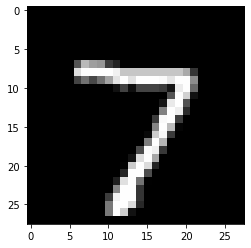

In [0]:
# 일단 저 위에가 i번째 가설이 맞다고 본다면
# 예측값 뽑아내는 연습을 일단 해보자.
# 이 셀에서 하는 건 각 가설에 대한 예측값은 아닐 것이다.
# 위에서 두 번 돌렸으니까 두 번째 가설에 대한 예측값일 것.
# 그럼에도 불구하고, 일단 예측값을 nd.array로 받아서 원소끼리 받는 연습을 해보기 위해서 뽑아지나 보는 것.

# Q) 왜 -261, -195 이렇게 나올까..? 더해서 1인 확률이 나와야 하는 게 아닌가..?

# print(mnist.test.images[0]) # scale되어 있음.

tmp_result = sess.run(H, feed_dict = { X : mnist.test.images})
print(tmp_result)

plt.imshow(mnist.test.images[0].reshape(28, 28), cmap = "gray")

# 7번째가 가장 크긴 한데, 뭘 잘못 생각하고 있는 것인가!
# learning_rate, epoch 달랐다.

### **강사님 해설**
#### 1. Logic 이용(OOP X)
* Logic 짜는 방법

    - 1) 모델을 10개 만들고, 각각의 모델에서 한 번씩 학습 진행. : 내가 처음에 했던 방법(비효율적).
    - 2) 전체 그래프 node(모델 껍데기) 만들어 놓고 학습만 나중에 10번 진행.

* 정확도 구하는 방법
    - 1) 10번의 학습을 진행하고, 예측값을 구한다.
    - 2) label 데이터와 비교한다.
    - 3) 하나의 정확도를 도출한다.

* 문제점 : **Is prediction possible?**
    - 1) for loop을 돌면서 학습하는 과정에서 마지막 model만 남는다.
    - 2) prediction을 진행하기 위해서는, 10개의 모델이 다 남아 있어야 한다.

#### 2. OOP 이용
* Logic을 이용해 for loop을 사용하면, 10개 모델 각각에 대해 W, b 값을 저장할 수 없다.
* 가설 자체, W와 b를 모두 저장해야 하므로, **객체지향 방식**을 사용할 필요가 있다.


## **강사님 코드**

> Kaggle data 이용


In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# data loading

# mnist = pd.read_csv("./data/DigitRecognizer/train.csv")
mnist = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/train.csv")
num_of_train = int(mnist.shape[0] * 0.8)
train_data = mnist.loc[:num_of_train, :]
test_data = mnist.loc[num_of_train +1:, :]

train_x_data = train_data.drop("label", axis = 1, inplace = False).values
train_y_data = tf.one_hot(train_data["label"].values, 10)
sess = tf.Session()
train_y_data = sess.run(train_y_data)

test_x_data = test_data.drop("label", axis = 1, inplace = False).values
test_y_data = tf.one_hot(train_data["label"].values, 10)
test_y_data = sess.run(test_y_data)

# MinMaxScaling
train_x_data = MinMaxScaler().fit_transform(train_x_data)
test_x_data = MinMaxScaler().fit_transform(test_x_data)

In [0]:
# Model
tf.reset_default_graph()

# placeholder
X = tf.placeholder(shape = [None, 784], dtype=tf.float32)
Y = tf.placeholder(shape = [None, 10], dtype=tf.float32)
dropout_rate = tf.placeholder(dtype=tf.float32)

# convolution layer
# 입력 데이터 4차원
x_img = tf.reshape(X, [-1,28,28,1])
L1 = tf.layers.conv2d(inputs=x_img, filters=32,
                     kernel_size=[3,3], padding="SAME",
                     strides=1, activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(inputs=L1, pool_size=[2,2],
                            padding="SAME",
                            strides=2)
L1 = tf.layers.dropout(inputs=L1, rate=dropout_rate)

L2 = tf.layers.conv2d(inputs=L1, filters=64,
                     kernel_size=[3,3], padding="SAME",
                     strides=1, activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(inputs=L2, pool_size=[2,2],
                            padding="SAME",
                            strides=2)
L2 = tf.layers.dropout(inputs=L2, rate=dropout_rate)

# FC Layer = dense layer
L2 = tf.reshape(L2, [-1, 7*7*64])

dense1 = tf.layers.dense(inputs=L2, units=256,
                        activation=tf.nn.relu)
dense1 = tf.layers.dropout(inputs=dense1, rate=dropout_rate)

dense2 = tf.layers.dense(inputs=dense1, units=128,
                        activation=tf.nn.relu)
dense2 = tf.layers.dropout(inputs=dense2, rate=dropout_rate)

dense3 = tf.layers.dense(inputs=dense2, units=512,
                        activation=tf.nn.relu)
dense3 = tf.layers.dropout(inputs=dense3, rate=dropout_rate)

H = tf.layers.dense(inputs=dense3, units=10)

# cost
cost = tf.losses.softmax_cross_entropy(Y, H)

# train
train = tf.train.AdagradOptimizer(learning_rate=0.001).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# ensemble
num_of_models = 10
result_model = np.zeros([test_x_data.shape[0], 10])

for models in range(num_of_models):
    # 학습
    num_of_epoch = 30
    batch_size = 100
    
    for step in range(num_of_epoch):
        num_of_iter = int(train_x_data.shape[0] / batch_size)
        cost_val = 0
        idx = 0
        for i in range(num_of_iter):
            batch_x = train_x_data[idx:idx+batch_size, :]
            batch_y = train_y_data[idx:idx+batch_size, :]
            idx = idx + batch_size
            _, cost_val = sess.run([train, cost], feed_dict = { X :batch_x,
                                                               Y : batch_y,
                                                              dropout_rate = 0.4})
            
        if step % 3 == 0:
            print("cost : {}".format{cost_val})
            
    tmp = sess.run(H, feed_dict = { X : test_x_data,
                                  Y : test_y_data,
                                  dropout_rate : 0})
    
    result_model = result_model + tmp
    
    # 정확도
    predict = np.argmax(result_model, 1)
    correct = np.equal(predict, np.argmax(test_y_data, 1))
    accuracy = np.mean(correct)
    print("정확도 : {}".format(accuracy))
    